
# Monte Carlo simulation of 2D Ising model

O Hamiltoniano do sistema é $$\mathcal{H} = -J\sum_{\langle ij\rangle} S_iS_j ,$$

onde $J$ é a intensidade da interação 

O parâmetro de ordem é a magnetização média: $$m=\frac{1}{N}\sum_i S_i.$$
No caso em que $m=0$, temos um estado desordenado e quando temos $m\neq 0$ temos uma preferência de algum valor de spin, ou seja, dizemos que o sistema está ordenado.

Os principais passos do algorítmo de metropolis são:
* 1 Preparar uma configuração inicial de N spins.
* 2 Flipar o spin de um sitio aleatório.
* 3 Calcular a mudança na energia $dE$.
* 4 Se $dE<0$, aceite a mudança. Caso contrário aceite a mudança com probabilidade $e^{\frac{-dE}{T}}$
* 5 Repita 2-4.


O passo 4 garante um estado final de equilibrio

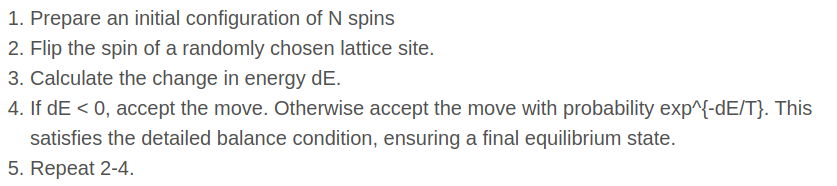

In [8]:
import numpy as np
import cv2
import sys as s
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.sparse import spdiags,linalg,eye

# 1

In [9]:
# ------------------Gera o estado aleatório inicial---------------------------------------------
state = np.random.randint(2, size=(3,3))
#print(state)
state = 2*state
#print(state)
state = state-1
#print(state)

def state_0(N):
    state = 2*np.random.randint(2, size=(N,N))-1
    #print(state)
    return state

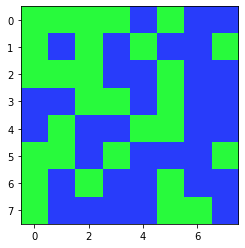

In [10]:
a=state_0(8)
def plot_state(state):
    M,N = np.shape(state)[0],np.shape(state)[1]
    pixels=[]
    for i in range(0,N):
        for j in range(0,N):
            if state[i,j]==1:
                pixels.append((40,250,60))#verde
            if state[i,j]==-1:
                pixels.append((40,60,250))#azul
    im2 = Image.new("RGB", (N,N))
    im2.putdata(pixels)
    plt.imshow(im2)
    plt.show()
plot_state(a)

In [11]:
#!pip install jupyterplot
from jupyterplot import ProgressPlot
import numpy as np


pp = ProgressPlot()
for i in range(1000):
    pp.update(np.sin(i / 100))
pp.finalize()

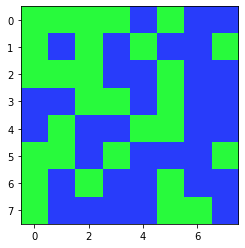

-2
-6


In [12]:
#------------Calcula a energia do sítio---------------------
def energy(state,a,b):
    M,N = np.shape(state)[0],np.shape(state)[1]
    E=0
    nb = state[(a+1)%N,b] + state[a,(b+1)%N] + state[(a-1)%N,b] + state[a,(b-1)%N]   
    E+=-nb*state[a,b]
    return E
def calcMag(config):
    mag = np.sum(config)
    return mag
plot_state(a)
print(energy(a,2,2))
print(calcMag(a))
#s.exit()
#state=state_0(4)
#all_energy=0
#print(state)
#for i in range(0,np.shape(state)[0]):
#    for j in range(0,np.shape(state)[1]):
#        all_energy+=energy(state,i,j)
#print(all_energy)

# 2, 3 e 4


In [13]:
'''Essa função está funcionante!'''
# função que faz a evolução temporal, trocando aleatóriamete um sitio
# e depois avaliado se vai aceitar a mudança, ou se vai talvez aceitar :D
# no segundo caso é aceito usando uma probabilidade que está associada a ela uma temperatura.
# beta = 1/T
Mag=[]
step=[]
def Time_evolution_2(state,T,steps):
    beta=1/T
    for passo in range(steps):
        for i in range(np.shape(state)[0]):
            for j in range(np.shape(state)[0]):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rd.random() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
        mag = np.sum(config)
        Mag.append(mag)
        step.append(passo)
    return config,Mag,step
Time_evolution_2()

TypeError: Time_evolution_2() missing 3 required positional arguments: 'state', 'T', and 'steps'

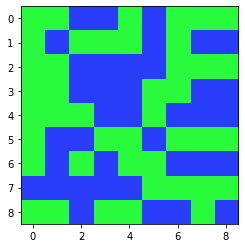

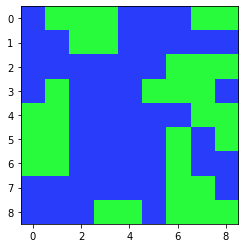

0


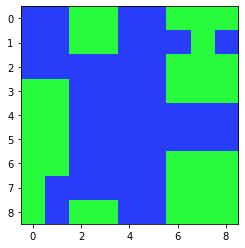

1


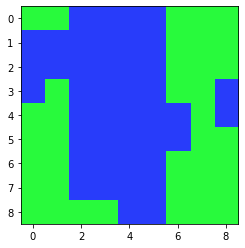

2


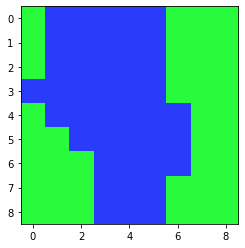

3


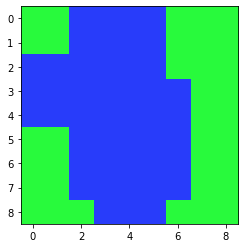

4


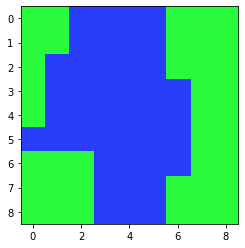

5


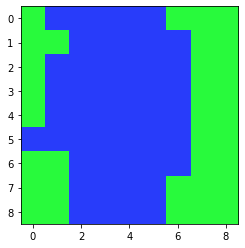

6


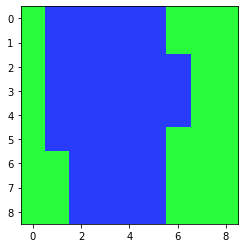

7


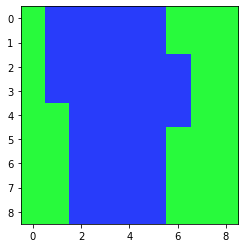

8


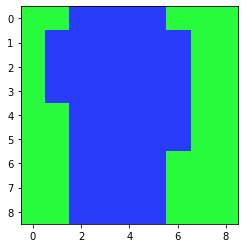

9


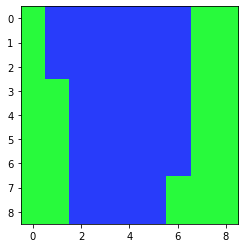

10


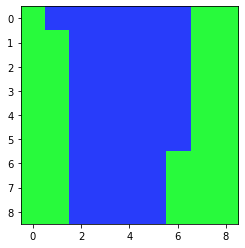

11


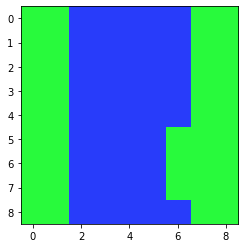

12


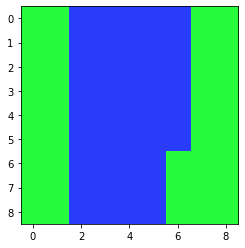

13


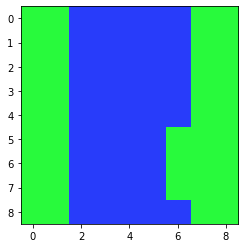

14


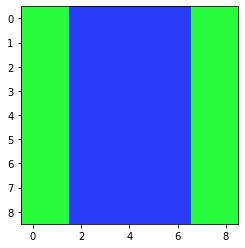

15


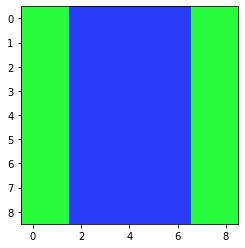

16


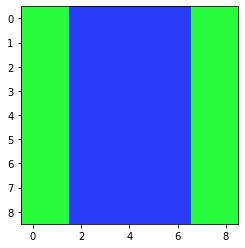

17


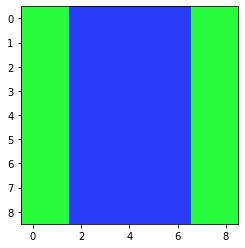

18


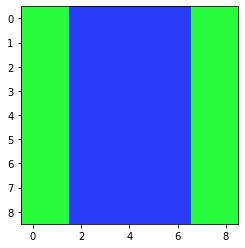

19


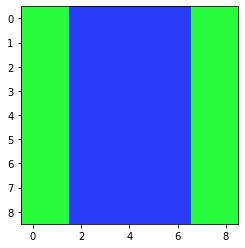

20


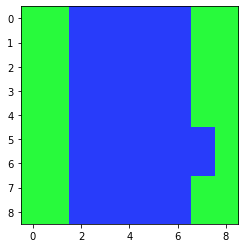

21


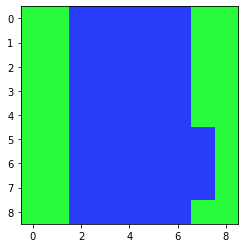

22


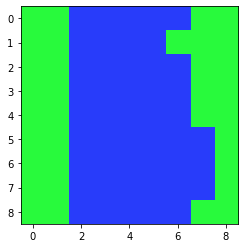

23


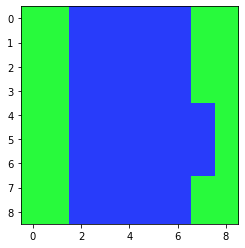

24


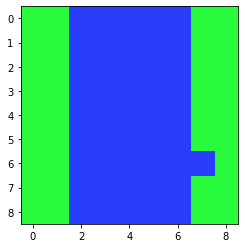

25


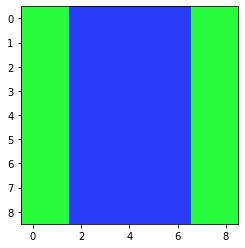

26


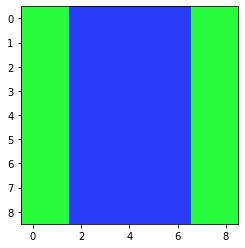

27


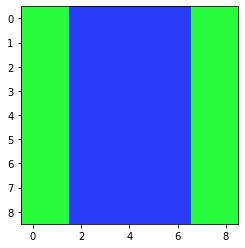

28


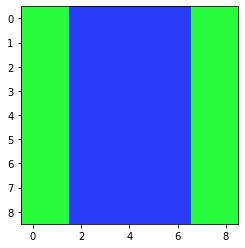

29


In [ ]:
N=9
config=state_0(N)
plot_state(config)
beta=1/1.5# Cold
#beta=1/2.27 # encontrar isso aqui #Variância da magnetização
#beta=1/3# Hot!
for i in range(30):
    #i*=10    
    Time_evolution_2(config,beta,1)
    plot_state(config)
    print(i)


## To do it!

* (__Perfumaria__)Implementar o gráfico evoluindo no tempo.
* Mostrar o grafico da magnetização em função dos passos.


* Mostrar o gráfico da energia dE em função dos passos.
* Colocar o gráfico da energia total em função dos passos.
* Se possível usando uma classe pra fazer toda a função.

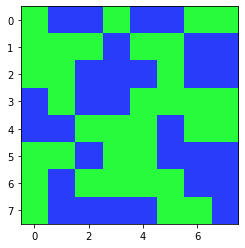

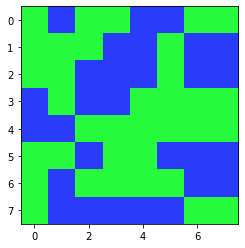

In [ ]:
N=8
beta=1/2.32
config=state_0(N)
#print('state = ',config)
plot_state(config)
for i in range(np.shape(state)[0]):
    for j in range(np.shape(state)[0]):
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
        s =  config[a, b]
        #print('a = ',a)
        #print('(a+1)%N = ',(a+1)%N)
        
        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
        cost = 2*s*nb
                
        if cost < 0:
            s *= -1
        elif rd.random() < np.exp(-cost*beta):
            s *= -1
        config[a, b] = s
#print('-------------------------------------')
plot_state(config)
#print('config = ',config)

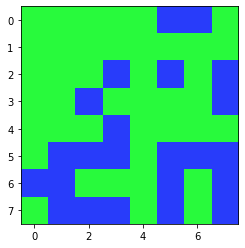

TypeError: Time_evolution_2() missing 1 required positional argument: 'steps'

In [ ]:
T= np.linspace(1.53, 3.28, 32)
for i in T:
    beta=1.0/i
    #print(beta)
    z=state_0(8)
    #print(Time_evolution(z,beta))
    plot_state(z)
    plot_state(Time_evolution_2(z,beta))

## to do

* grafico da magnetização(temperatura)
* grafico da energia 
* grafico da magnetização para verificar a tem
* primeira tetativa de N para termalizar = numero de spins
* segunda tentativa de N para termalizar = numero de spins**2
* depois de termalizar, garantindo o equilibrio térmico, anotar a cada passo, a magnetização e a energia total para depois realizar a média para cada temperatura.

In [ ]:
def Termalizator(state,T):
    a=np.shape(state)[0]
    b=np.shape(state)[1]
    step=a*b
    beta=1/T
    state2=Time_evolution_2(state,beta,step)
    E=[]
    Mag=[]
    Energy=0
    for i in range(a):
        for j in range(b):
            E+=energy(state2,i,j)
    Mag.append(calcMag(state))
    return state2
N=8
beta=1/2.32
config=state_0(N)
Termalizator(config,2.32)






/home/v/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexError: tuple index out of range

## Deve obedecer essas duas regras

* Ergodicidade:
    Cada estado deve ser acessivel por todos os outros estados num número finito de passos.

* Balanço detalhado

    Termalizar

In [16]:
def Time_evolution_2(state,T,steps):
    beta=1/T
    Mag=[]
    Energy=[]
    E=0
    passos=[]
    A=np.shape(state)[0]
    B=np.shape(state)[1]
    for aux in range(steps):
        E=0
        for i in range(np.shape(state)[0]):
            for j in range(np.shape(state)[0]):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rd.random() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
        for i in range(A):
            for j in range(B):
                E+=energy(state,i,j)
        Energy.append(E)
        Mag.append(np.sum(config)/(A*B))
        passos.append(aux)
        
    return config,Energy,Mag,passos
N=12
#beta=1/1.5# Cold
#beta=1/2.27 # encontrar isso aqui #Variância da magnetização
#beta=1/3# Hot!
T=1.0

config=state_0(N)
a,b,c,steps = Time_evolution_2(config,T,200)
a,b,c,steps = Time_evolution_2(config,T,600)
print(np.shape(steps))
#x=np.linspace(0,64,64)
import matplotlib.pyplot as plt
#plt.plot(steps,c)#magnetização
#plt.show()

#plt.plot(x,b)#enery

(600,)


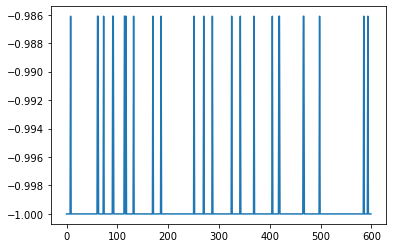

In [17]:
plt.plot(steps,c)
plt.show()

# implementar as médias
Guardar os valores de mag e energy depois de termalizado e plotar o valor médio dessas grandezas em função da temperatura.

In [ ]:
Temperatures=np.linspace(1.0,3.0,20)
print(Temperatures)

[1.         1.10526316 1.21052632 1.31578947 1.42105263 1.52631579
 1.63157895 1.73684211 1.84210526 1.94736842 2.05263158 2.15789474
 2.26315789 2.36842105 2.47368421 2.57894737 2.68421053 2.78947368
 2.89473684 3.        ]


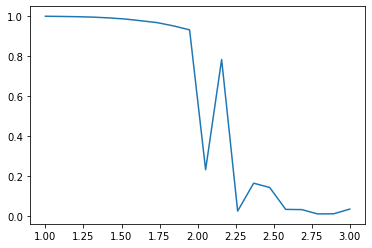

In [ ]:
x=[]
y=[]
N=12
for T in Temperatures:
    config=state_0(N)
    config,Energy,Mag,passos = Time_evolution_2(config,T,200)
    config,Energy,Mag,passos = Time_evolution_2(config,T,5000)
    Mag_medium=abs(sum(Mag)/max(passos))
    
    y.append(Mag_medium)
    x.append(T)
plt.plot(x,y)
plt.show()    
#s.exit()
    

Acabar esse jupyter 


Ver a implementação do monte carlo


dar uma olhada na literatura sobre o modelo de potts

In [ ]:

def mcmove(config, beta):
    '''
    Monte Carlo move using Metropolis algorithm 
    '''
    
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config



def calcEnergy(config):
    '''
    Energy of a given configuration
    '''
    energy = 0 
    
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting



def calcMag(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag

In [ ]:
## NOTE: change these parameters for a smaller and faster simulation 
#----------------------------------------------------------------------


nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 2**8       #  number of MC sweeps for equilibration
mcSteps = 2**9       #  number of MC sweeps for calculation


T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values